# Students Do: Clustering costumers for e-commerce

Once you have prepared the data, it's time to start looking for patterns that could lead you to define customer clusters. After talking with the CFO of the company about the next quarter goals, you figured out that one way to understand customers, from the available data, is to cluster them according to their spending capacity, however you have to find how many groups you can define.

You decide to use your new unsupervised learning skills and put k-means in action!

In [1]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

## Instructions

Accomplish the following tasks and use K-Means to cluster the customers data.

 * Load the data

In [2]:
# Loading data
file_path = Path("../Resources/wholesale_customers_data_cleaned.csv")
df_shopping = pd.read_csv(file_path)
df_shopping.head()

,Fresh,Milk,Grocery,Frozen,Detergents and Paper,Delicatessen,Channel
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1


* Identify the best number of clusters using the elbow curve

In [3]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_shopping)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\19179\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,2736.172727
1,2,2030.751177
2,3,1661.860039
3,4,1374.700337
4,5,1100.131058


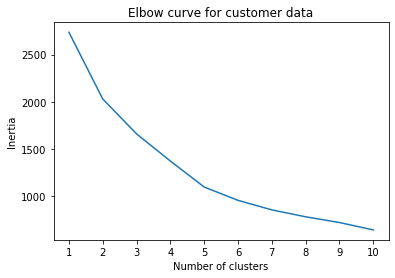

In [4]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

* Create a function called `get_clusters(k, data)` that finds the `k` clusters using K-Means on `data`. The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

In [5]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

* Create a 2D-Scatter plot to analyze the clusters using `x="Frozen"` and `y="Grocery"`.

**Analyzing Clusters with the Best Value of `k`**

In [15]:
clusters = get_clusters(4, df_shopping)

In [16]:
clusters

,Fresh,Milk,Grocery,Frozen,Detergents and Paper,Delicatessen,Channel,class
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1,3
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1,3
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1,3
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1,0
...,...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,0,0
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,0,0
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1,3
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0,1


In [19]:
# explore clusters; e.g. fresh and frozen, 

def show_clusters(df):
    plt.scatter(df['Fresh'], df['Milk'], c=df['class'])
    plt.xlabel('Fresh')
    plt.ylabel('Milk')
    plt.show()

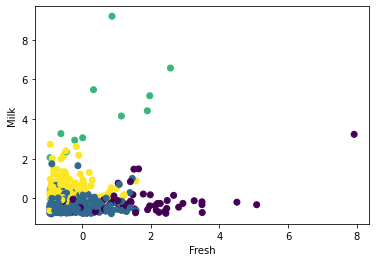

In [20]:
show_clusters(clusters)